# Capstone project : Predict the probability of getting in an accident and the severity(week 2)

### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

#### 1-Business Problem

The mortality and morbidity rates from road traffic accidents are increasing annually in nearly all the developed countries. Despite all the causes of accidents, it will be great to know the probability of having an accident is huge or not so the conductor will be more conscious and more carefull on the road thus we can dicrease the number of accidents

#### 2- Data :

* we will be using the dataset provided by IBM course's

In [1]:
import pandas as pd 
data = pd.read_csv("./data/Data-Collisions.csv") 

c:\users\oumaima\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


The datasets contains a lot of features that might infect the probability of getting in an accident or not like ROADCOND, LIGHTCOND...

In [3]:
data.shape

(194673, 38)

The dataset contains 194673 individuals and 38 features


Since we want to predict the severity of an accident, the target of our model will be the "SEVERITYCODE"

In [8]:
data.SEVERITYCODE.values

array([2, 1, 1, ..., 2, 2, 1], dtype=int64)

#### 3-Methodology

We have first to clean our dataset from any unrelatad column or messing values so we make sure to have a correct prediction 

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 
df = pd.read_csv("./data/Data-Collisions.csv") 

c:\users\oumaima\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Get the ratio of column with above 80% of missing values

In [25]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['columns_name','missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] /df.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.777]

,columns_name,missing_count,missing_ratio
12,EXCEPTRSNDESC,189035,0.971039
25,INATTENTIONIND,164868,0.846897
30,PEDROWNOTGRNT,190006,0.976026
32,SPEEDING,185340,0.952058


In [31]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

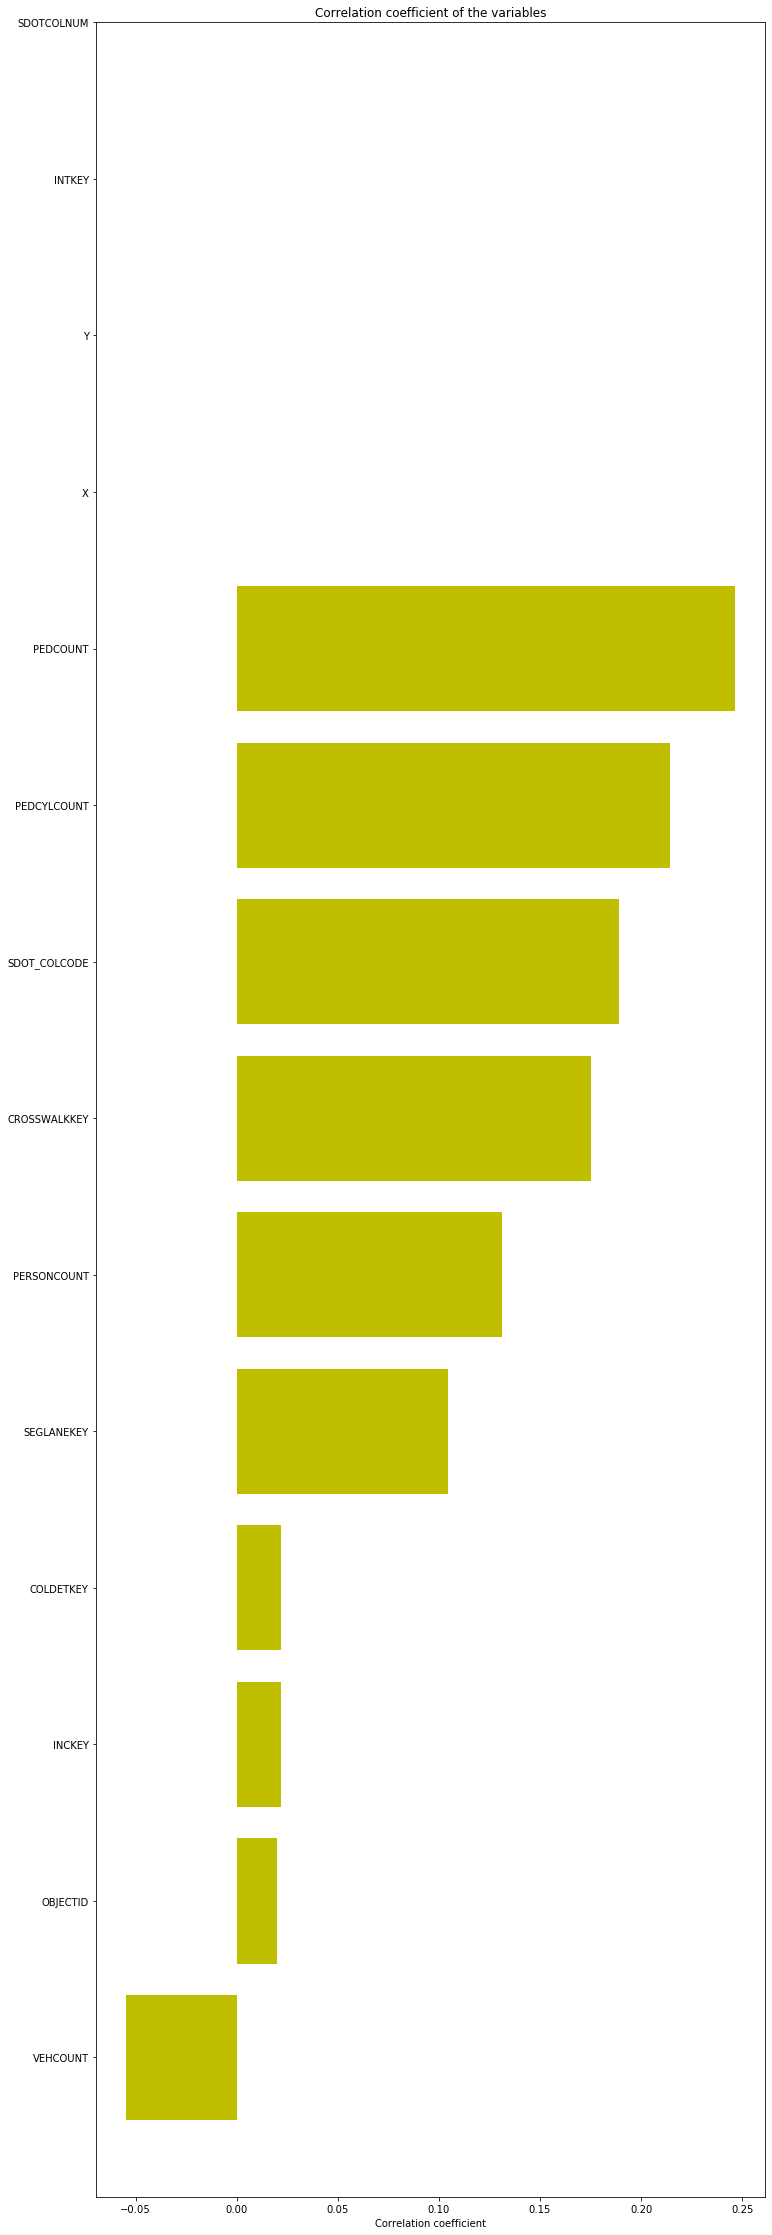

In [34]:
x_cols = [col for col in df.columns if col not in ['SEVERITYCODE', 'SEVERITYCODE.1'] if (df[col].dtype=='float64' or df[col].dtype=='int64')]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df.SEVERITYCODE.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

we can detect that SDOTCOLUMN, INTKEY, Y,X , there is no correlation with the SEVERITYCODE

Let's get our highly correlated data

In [35]:
corr_df_sel = corr_df.loc[(corr_df['corr_values']>0.05) | (corr_df['corr_values'] < -0.05)]
corr_df_sel

,col_labels,corr_values
9,VEHCOUNT,-0.054686
12,SEGLANEKEY,0.104276
6,PERSONCOUNT,0.130949
13,CROSSWALKKEY,0.175093
10,SDOT_COLCODE,0.188905
8,PEDCYLCOUNT,0.214218
7,PEDCOUNT,0.246338


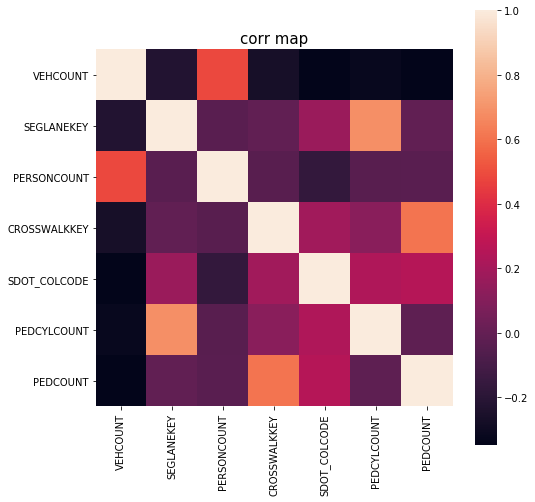

In [36]:
corr_df_ = corr_df_sel.col_labels.tolist()

tem_df = df[corr_df_]

corrmat = tem_df.corr(method='spearman')
fig,ax= plt.subplots(figsize=(8,8))

sns.heatmap(corrmat,vmax=1,square = True)
plt.title('corr map',fontsize=15)
plt.show()

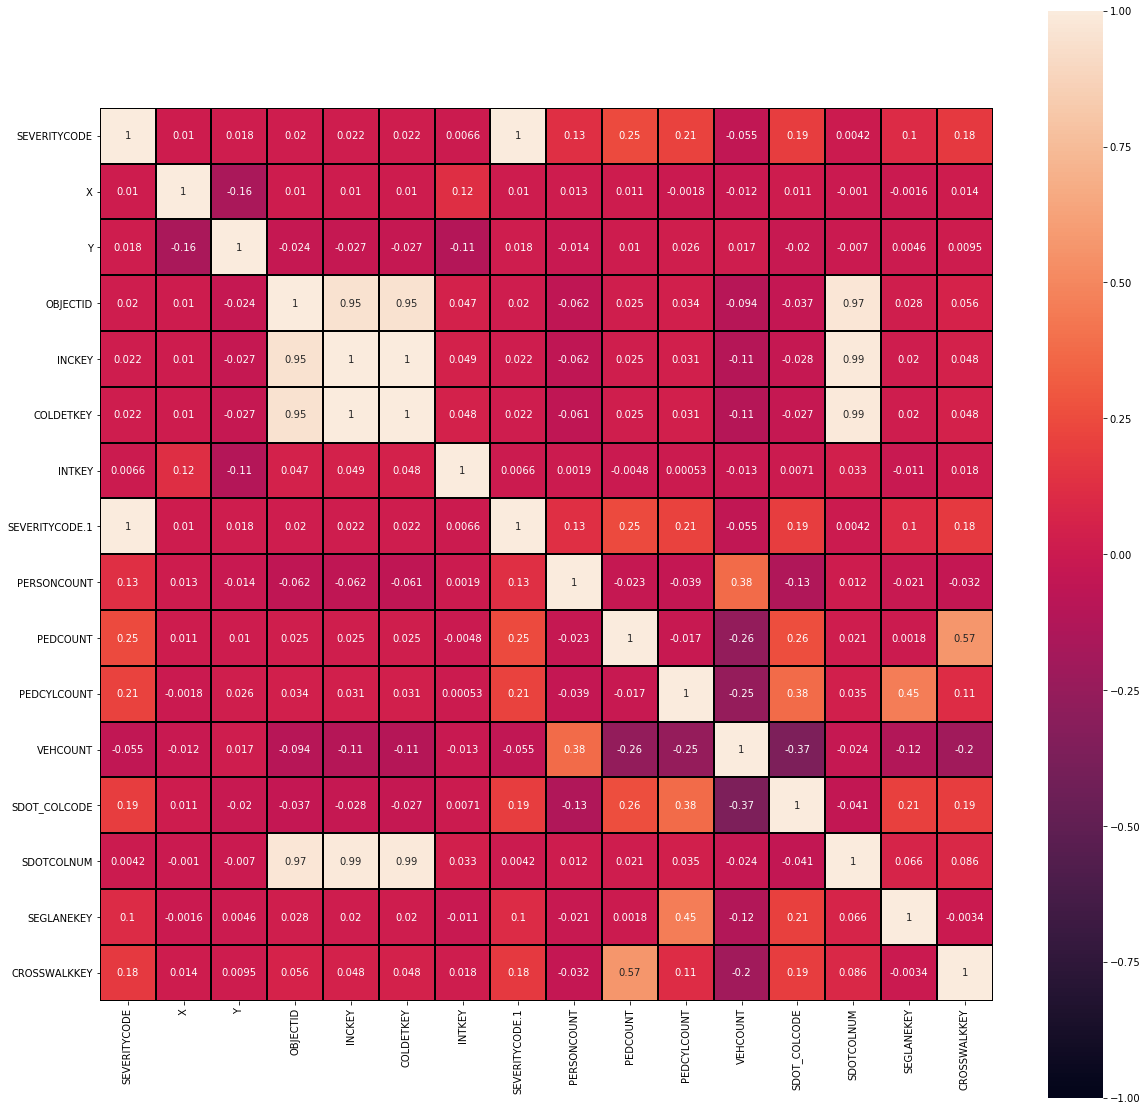

In [37]:
fig=plt.gcf()
fig.set_size_inches(20,20)
fig=sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [6]:
df=data[['SEVERITYCODE','ROADCOND','WEATHER','LIGHTCOND','ADDRTYPE','VEHCOUNT','PERSONCOUNT','SPEEDING']]

we will start by finding the correlation betwwen our independant features

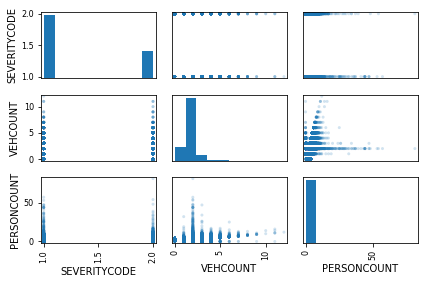

In [10]:
from pandas.plotting import scatter_matrix
axes = scatter_matrix(df, alpha=0.2)
plt.tight_layout()
plt.savefig('scatter_matrix.png')

we check how the the weather condition influence in accident's severity

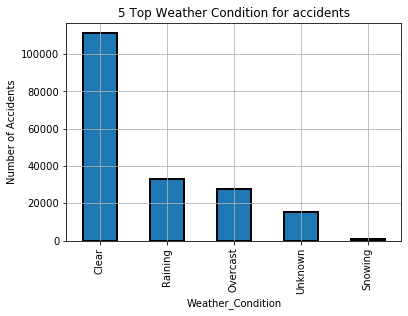

In [17]:
df['WEATHER'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather_Condition')
plt.ylabel('Number of Accidents')
plt.title('5 Top Weather Condition for accidents')
plt.grid()
plt.ioff()

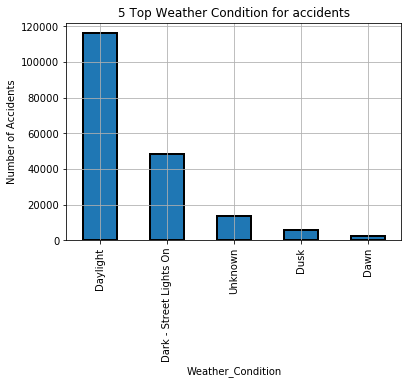

In [18]:
df['LIGHTCOND'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('LIGHTCOND')
plt.ylabel('Number of Accidents')
plt.title('5 Top Light Condition for accidents')
plt.grid()
plt.ioff()

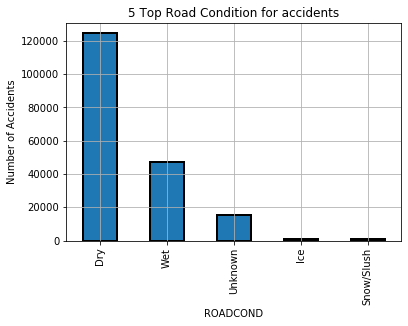

In [20]:
df['ROADCOND'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('ROADCOND')
plt.ylabel('Number of Accidents')
plt.title('5 Top Road Condition for accidents')
plt.grid()
plt.ioff()